# The dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

[Download the Dataset](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [1]:
#importing dependencies
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import sqrt
from IPython.display import Image

In [2]:
#reading the dataframe
df = pd.read_csv('../data/CC GENERAL.csv')

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
#let's see some statistic info
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
df.select_dtypes(exclude='object').isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

As you can see, there are columns with nan, let's impute nan values with the mean!

In [6]:
#Let's get column name without copy-paste
df_null = pd.DataFrame(df.select_dtypes(exclude='object').isnull().sum())
df_null.columns = ['value']
list_with_nan = np.array(df_null.loc[df_null['value']!=0].index)

In [7]:
for col in list_with_nan:
    df[col] = df[col].fillna(df[col].mean())

In [8]:
#let's check if worked
df[list_with_nan].isnull().sum()

CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64

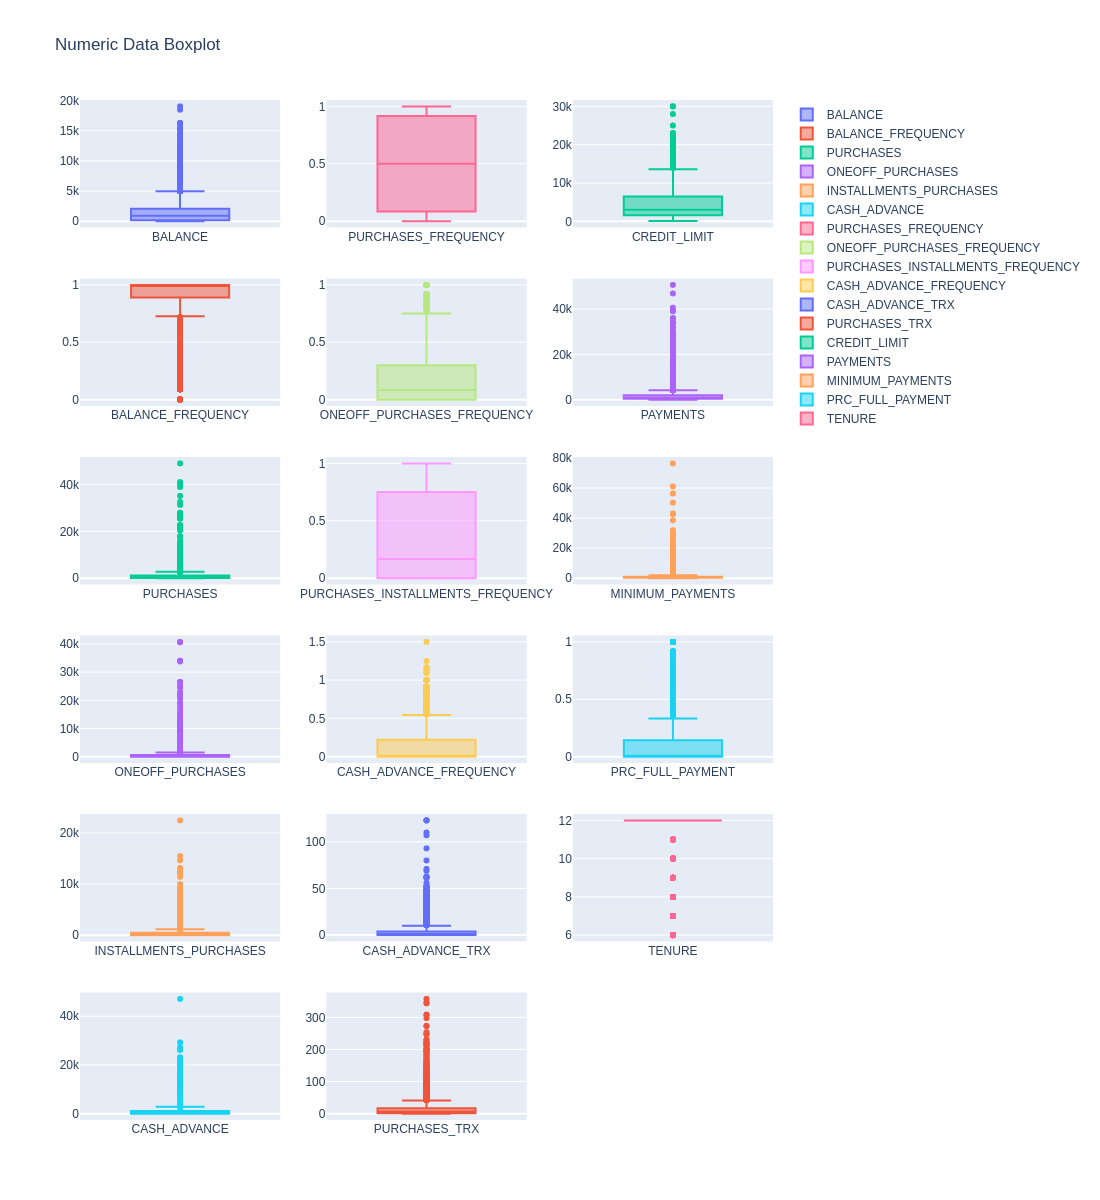

In [9]:
#Transforming statistic info into a multiple boxplot chart
row_n = 1
col_n = 1
fig = make_subplots(rows=6, cols=3)
for col in df.select_dtypes(exclude='object').columns:
    if row_n == 7:
        col_n +=1
        row_n = 1
    fig.add_trace(go.Box(y=df[col].values, name=df[col].name),
    row=row_n, col=col_n)


    row_n +=1

fig.update_layout(height=1200, width=1100, title_text="Numeric Data Boxplot")
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see, there's a lot of columns with high values (+20k), other between 0 and 1.
We can use log to reduce `contamination`

In [10]:
#Here we can get the names of columns with the max value higher than 1.
reduce_col = []
for col in df.select_dtypes(exclude='object').columns:
    if df[col].max() > 1:
        print(col)
        reduce_col.append(col)

BALANCE
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
TENURE


Let's transform continuous variables into discrete variables 

In [11]:
# So, let's create a range 0-5 for the transformation.
for col in reduce_col:
    df[col] = pd.cut(df[col],8,labels=[0,1,2,3,4,5,6,7])
    df[col] = df[col].astype('int64')

In [12]:
df.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001        0           0.818182          0                 0   
1  C10002        1           0.909091          0                 0   
2  C10003        1           1.000000          0                 0   
3  C10004        0           0.636364          0                 0   
4  C10005        0           1.000000          0                 0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0             0             0.166667   
1                       0             1             0.000000   
2                       0             0             1.000000   
3                       0             0             0.083333   
4                       0             0             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              0             0   
1                       1                 0              0             1   
2                       0                 0              0             1   
3                       0                 0              0             1   
4                       0                 0              0             0   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0         0                 0          0.000000       7  
1         0                 0          0.222222       7  
2         0                 0          0.000000       7  
3         0                 0          0.000000       7  
4         0                 0          0.000000       7

In [13]:
#ok, it worked! So, let's work only with numeric values
df = df[reduce_col].copy()

In [14]:
df.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0        0          0                 0                       0             0   
1        1          0                 0                       0             1   
2        1          0                 0                       0             0   
3        0          0                 0                       0             0   
4        0          0                 0                       0             0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              0             0   
1                       1                 0              0             1   
2                       0                 0              0             1   
3                       0                 0              0             1   
4                       0                 0              0             0   

   PAYMENTS  MINIMUM_PAYMENTS  TENURE  
0         0                 0       7  
1         0                 0       7  
2         0                 0       7  
3         0                 0       7  
4         0                 0       7

# Clustering!

So, Let's find the best number of clusters usign Elbow method (Sum of Square Distance)

In [15]:
min_clusters = 2
max_clusters = 10
inertias = np.zeros(shape= (max_clusters - min_clusters +1,))

In [16]:
for i in range(min_clusters, max_clusters+1):
    km = KMeans(n_clusters= i, random_state=42)
    km.fit(df)
    inertias[i-min_clusters] = km.inertia_

In [17]:
def optimal_number_of_clusters(inertias):
    x1, y1 = 2, inertias[0]
    x2, y2 = 20, inertias[len(inertias)-1]

    distances = []
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [18]:
n = optimal_number_of_clusters(inertias)
n

6

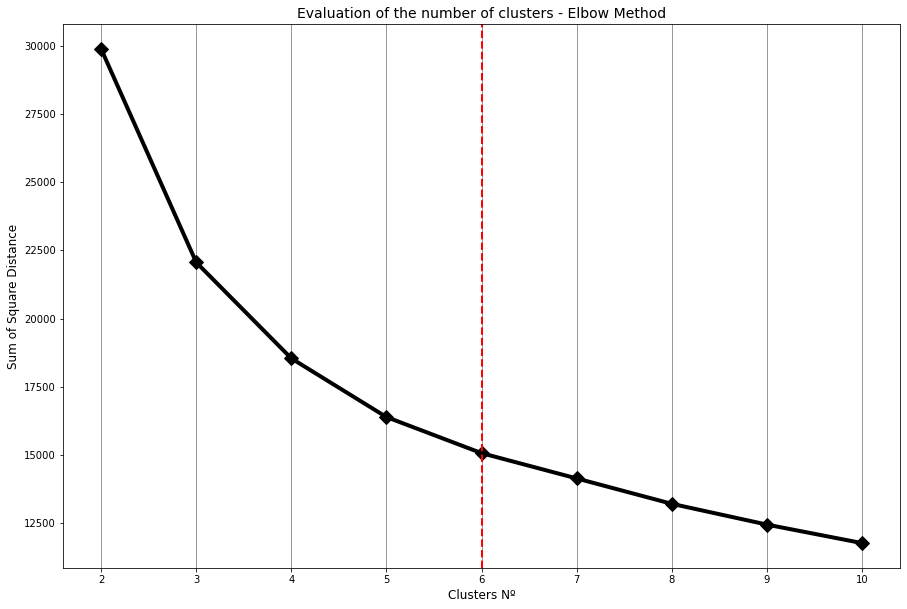

In [19]:
plt.figure(figsize=[15,10])
plt.plot(range(min_clusters,max_clusters+1), inertias, linewidth =4, color= 'black', marker='D', markersize=10)
plt.title("Evaluation of the number of clusters - Elbow Method", fontsize=14, color='black')
plt.xlabel("Clusters Nº", fontsize=12, color='black')
plt.ylabel("Sum of Square Distance", fontsize=12, color='black')
plt.grid(which = 'both',color='black', axis='x', alpha=0.5)
n_clusters = n
plt.axvline(x=n_clusters, linewidth=2, color='red', linestyle='--')

plt.show()

In [20]:
km = KMeans(n_clusters= n, random_state=42)
km.fit(df)
df['Cluster'] = km.labels_

In [21]:
df.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0        0          0                 0                       0             0   
1        1          0                 0                       0             1   
2        1          0                 0                       0             0   
3        0          0                 0                       0             0   
4        0          0                 0                       0             0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              0             0   
1                       1                 0              0             1   
2                       0                 0              0             1   
3                       0                 0              0             1   
4                       0                 0              0             0   

   PAYMENTS  MINIMUM_PAYMENTS  TENURE  Cluster  
0         0                 0       7        0  
1         0                 0       7        2  
2         0                 0       7        2  
3         0                 0       7        2  
4         0                 0       7        0

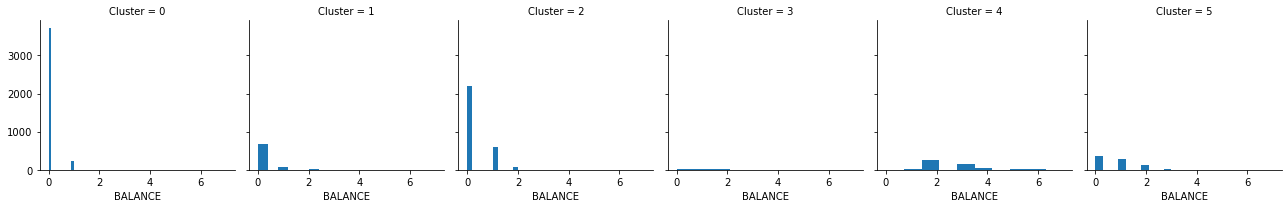

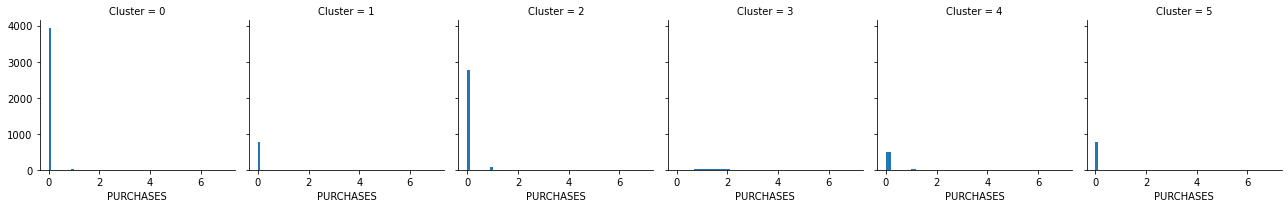

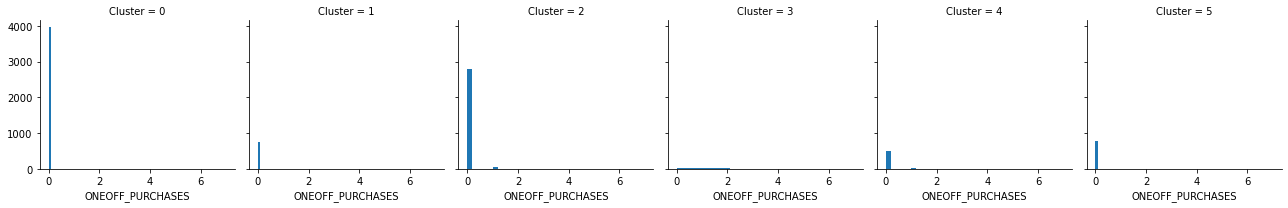

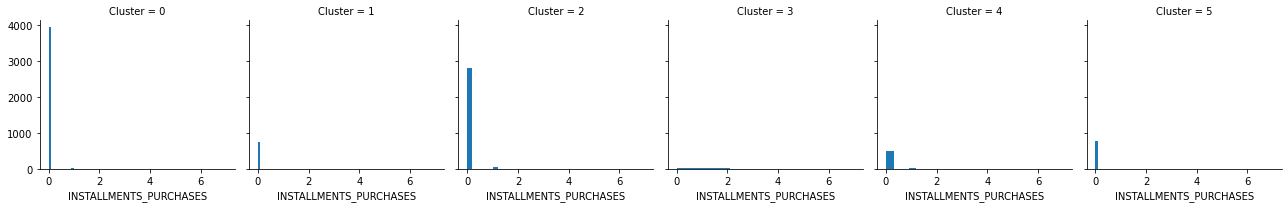

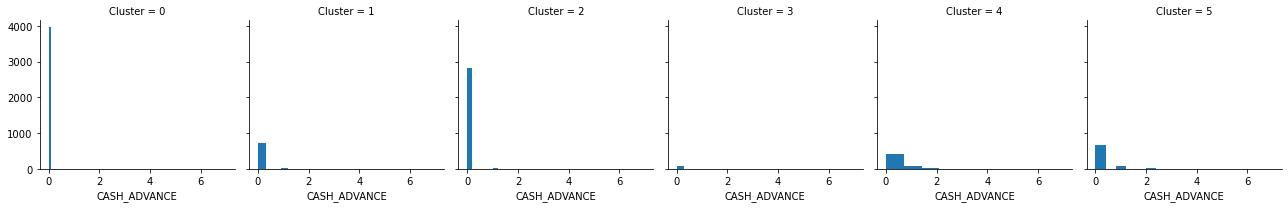

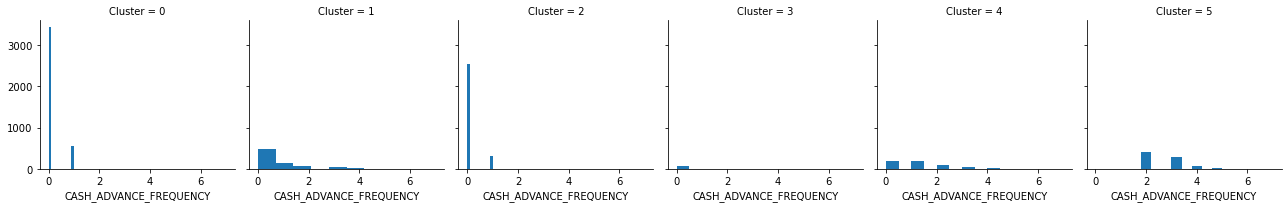

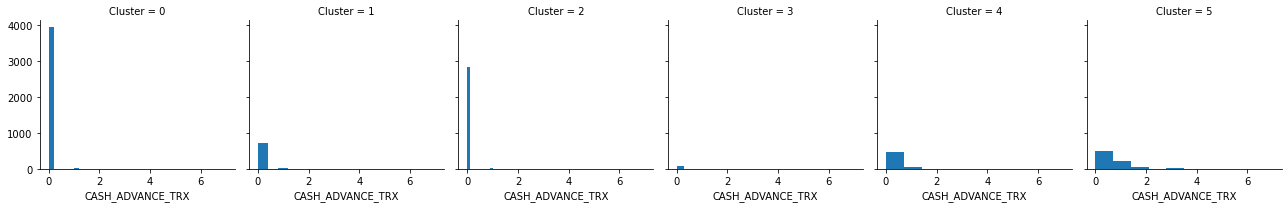

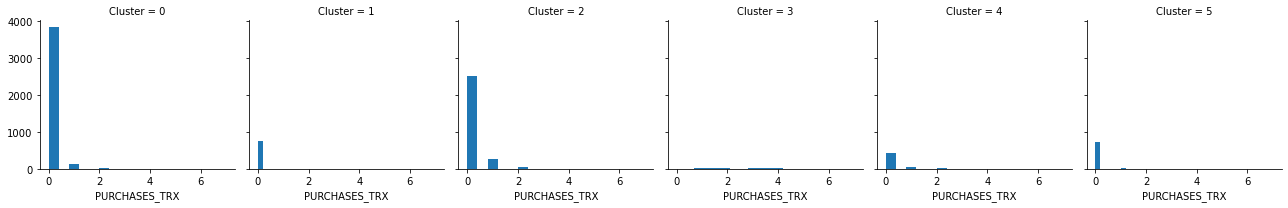

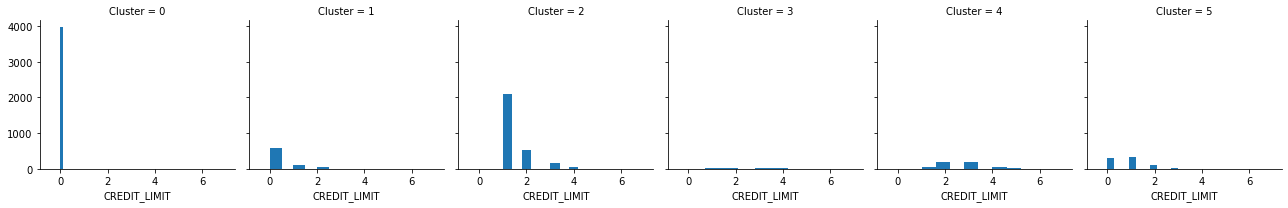

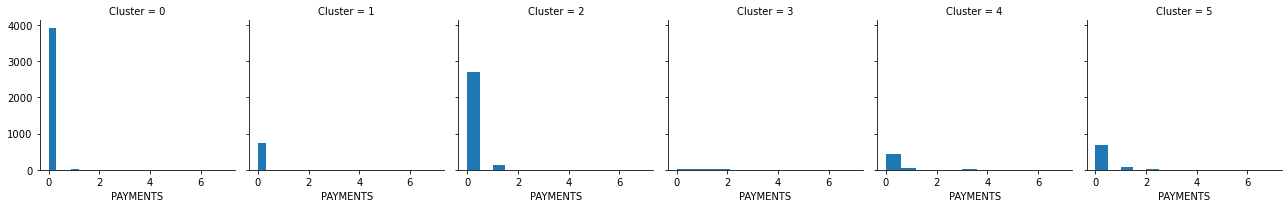

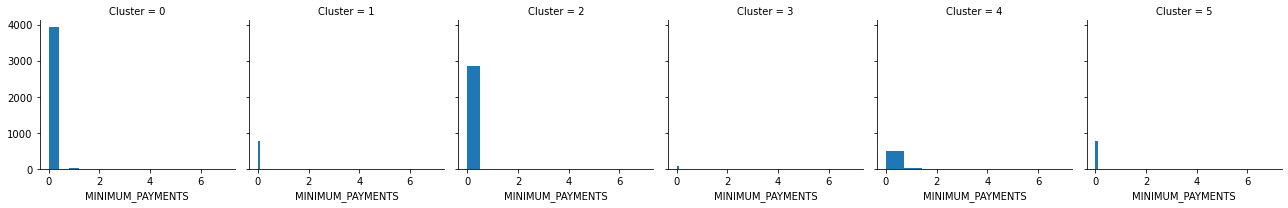

In [22]:
for column in df.columns[:-1:]:
    grid= sns.FacetGrid(df, col='Cluster')
    grid.map(plt.hist, column)

Ok, time to use groupby to see each cluster description

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   BALANCE                 8950 non-null   int64
 1   PURCHASES               8950 non-null   int64
 2   ONEOFF_PURCHASES        8950 non-null   int64
 3   INSTALLMENTS_PURCHASES  8950 non-null   int64
 4   CASH_ADVANCE            8950 non-null   int64
 5   CASH_ADVANCE_FREQUENCY  8950 non-null   int64
 6   CASH_ADVANCE_TRX        8950 non-null   int64
 7   PURCHASES_TRX           8950 non-null   int64
 8   CREDIT_LIMIT            8950 non-null   int64
 9   PAYMENTS                8950 non-null   int64
 10  MINIMUM_PAYMENTS        8950 non-null   int64
 11  TENURE                  8950 non-null   int64
 12  Cluster                 8950 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 874.1 KB


In [24]:
df.groupby(by='Cluster').mean()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                  
0        0.057338   0.002526          0.002021                0.005810   
1        0.175623   0.002621          0.001311                0.002621   
2        0.250438   0.025919          0.021016                0.022417   
3        1.277778   2.138889          1.708333                1.486111   
4        2.605010   0.065511          0.038536                0.075145   
5        0.716113   0.003836          0.002558                0.011509   

         CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
Cluster                                                           
0            0.000758                0.136903          0.004294   
1            0.051114                0.753604          0.064220   
2            0.012259                0.108932          0.004203   
3            0.097222                0.250000          0.097222   
4            0.246628                1.055877          0.134875   
5            0.168798                2.618926          0.512788   

         PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS    TENURE  
Cluster                                                                     
0             0.039656      0.000000  0.007830          0.012882  6.881788  
1             0.011796      0.327654  0.018349          0.001311  1.444299  
2             0.149212      1.364974  0.062697          0.009807  6.931349  
3             2.958333      2.736111  2.041667          0.069444  6.958333  
4             0.256262      2.527938  0.252408          0.086705  6.921002  
5             0.070332      0.801790  0.134271          0.001279  6.823529